# The Sparks Foundation - Data Science & Business Analytics Internship

# TASK 1 - Prediction using Supervised Machine Learning

# Steps:


Step 1 - Importing the dataset

Step 2 - Visualizing the dataset

Step 3 - Data preparation

Step 4 - Training the algorithm

Step 5 - Visualizing the model

Step 6 - Making predcitions

Step 7 - Evaluating the model

# Author:  Prabhat Wakade


# STEP 1 - Importing the dataset

In [25]:
#importing a libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

#to ignore a warnings
import warnings as wg
wg.filterwarnings("ignore")

In [26]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data=pd.read_csv(url)

#now let observe a data
s_data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [27]:
s_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [28]:
#to finds a number of rows and coloumns
s_data.shape

(25, 2)

In [29]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [30]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [31]:
#now we are check null values present in a datset
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

as we see there is no null values in our datset we can move towards our next step

# STEP 2 - Visualizing the dataset


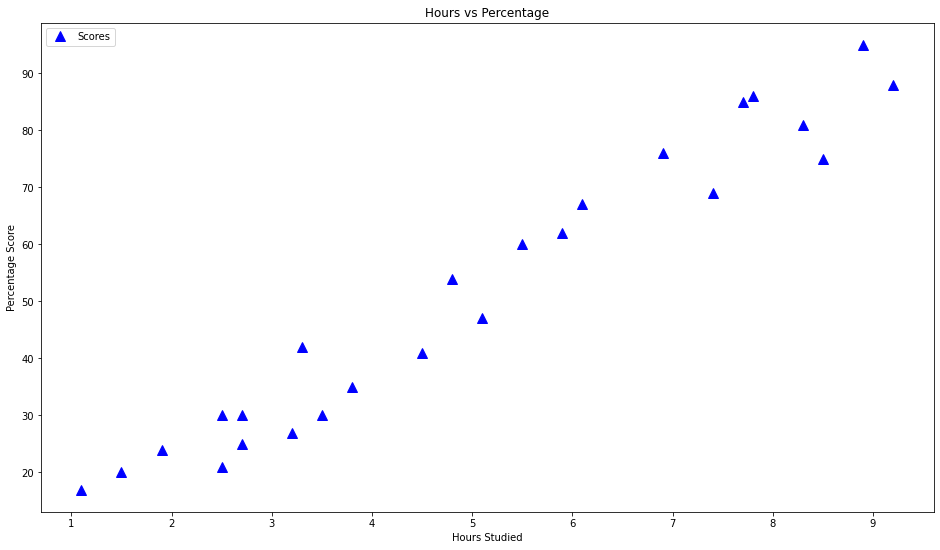

In [32]:
#plottong a dataset
plt.rcParams["figure.figsize"] = [16,9]
s_data.plot(x='Hours',y='Scores',style='^',color='blue',markersize='10')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

plt.show()


From the graph above, we can observe that there is a linear relationship between "hours studied" and "percentage score". So, we can use the linear regression supervised machine model on it to predict further values.

In [33]:
# we can also use .corr to determine the corelation between the variables
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#  STEP 3 - Data preparation

In this step we will divide the data into "features" (inputs) and "labels" (outputs). After that we will split the whole dataset into 2 parts - testing data and training data.

In [34]:
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [35]:
x=s_data.iloc[:,:1]
y = s_data.iloc[:, 1:].values


In [36]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [37]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [38]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


# STEP 4 - Training the Algorithm

We have splited our data into training and testing sets, and now we will train our Model

In [39]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# STEP 5 - Visualizing the model



After training the model, now its time to visualize it.

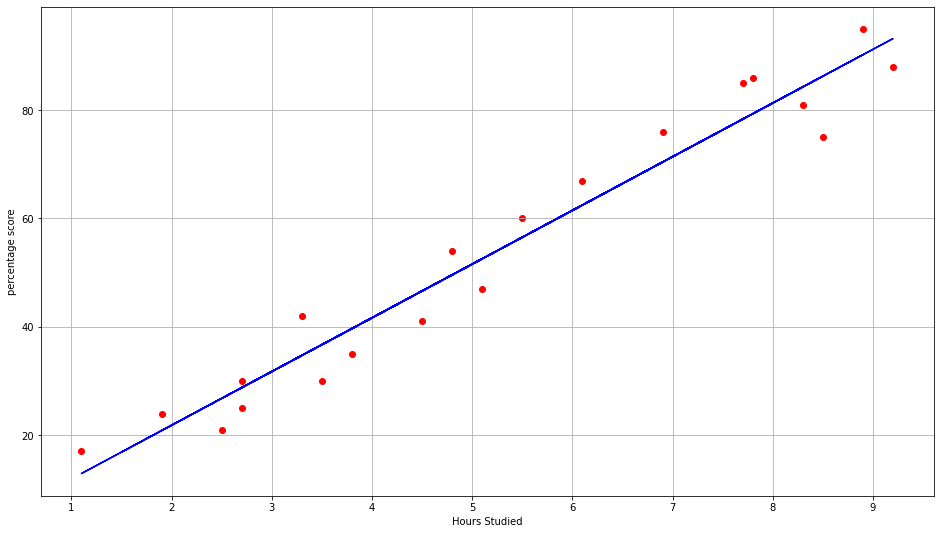

In [40]:
line = model.coef_*x + model.intercept_
#plotting for training data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_train,y_train,color='red')
plt.plot(x,line,color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('percentage score')
plt.grid()
plt.show()

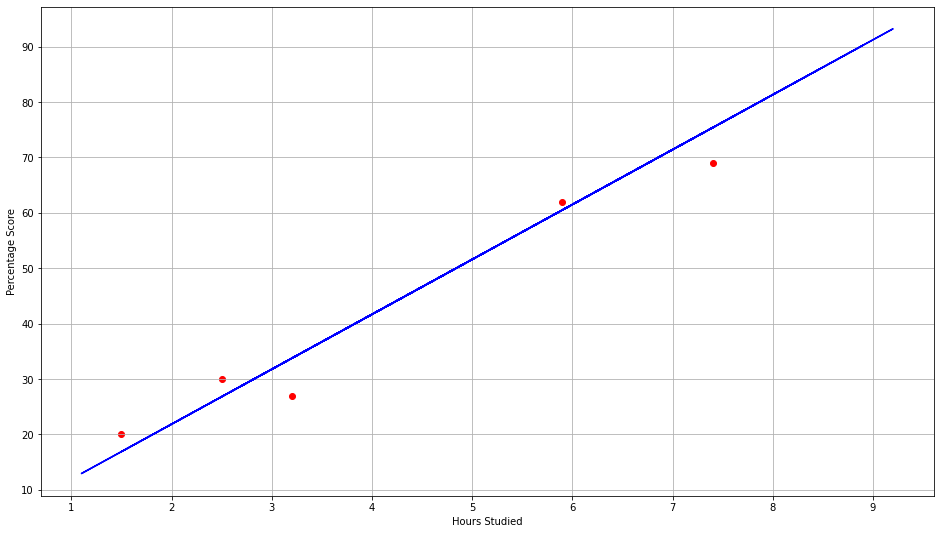

In [41]:
# Plotting for the testing data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_test,y_test,color='red')
plt.plot(x, line, color='blue');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

# STEP 6 - Making Predictions
 

Now that we have trained our algorithm, it's time to make some predictions.

In [42]:
print(x_test)#testing data -In Hours
y_prediction=model.predict(x_test) #preparing the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [43]:
# Comparing Actual vs Predicted
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [44]:
y_prediction

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [45]:
# Comparing Actual vs Predicted
df=pd.DataFrame({'actual':[y_test],'Predicated':[y_prediction]})
df


,actual,Predicated
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398048], [33.73226077948985], [7..."


In [46]:
# Testing with your own data
Hours=9.25
own_prediction=model.predict([[Hours]])
print("The predicted score if a person studies for",Hours,"hours is",own_prediction[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


Hence, it can be concluded that the predicted score if a person studies for 9.25 hours is 93.69173248737538

# STEP 7 - Evaluating the model

In the last step, we are going to evaluate our trained model by calculating mean absolute error.



In [47]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction))

Mean Absolute Error: 4.183859899002975


#    Thank you :)
